In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:/Users/Admin/Desktop/Data/Assignments New/Clustering/crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.shape

(50, 5)

In [5]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [10]:
data1=data.rename(columns={"Unnamed: 0":"country"})
data1.head()

,country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data1['country']=label_encoder.fit_transform(data1["country"])

In [14]:
from sklearn import preprocessing
data1_standardized = preprocessing.scale(data1)
print(data1_standardized)
data1_standardized = pd.DataFrame(data1_standardized)

[[-1.69774938  1.25517927  0.79078716 -0.52619514 -0.00345116]
 [-1.62845348  0.51301858  1.11805959 -1.22406668  2.50942392]
 [-1.55915759  0.07236067  1.49381682  1.00912225  1.05346626]
 [-1.4898617   0.23470832  0.23321191 -1.08449238 -0.18679398]
 [-1.4205658   0.28109336  1.2756352   1.77678094  2.08881393]
 [-1.35126991  0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.28197402 -1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-1.21267813 -0.43787481  0.81502956  0.45082502 -0.58583422]
 [-1.14338223  1.76541475  1.99078607  1.00912225  1.1505301 ]
 [-1.07408634  2.22926518  0.48775713 -0.38662083  0.49265293]
 [-1.00479045 -0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-0.93549455 -1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [-0.86619866  0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.79690277 -0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-0.72760688 -1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.65831098 -0.41468229 -0.67587817  0.03210209 -0.34

In [15]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [16]:
kmeans_clust=KMeans(n_clusters=3)
kmeans_clust.fit(data1_standardized)
kmeans_clust.labels_

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0])

In [17]:
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data1_standardized)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(data1_standardized.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,data1_standardized.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([82.25599773]),
 array([74.52702647]),
 array([67.79230294]),
 array([61.0781012]),
 array([58.42393217]),
 array([55.22197477])]

([<matplotlib.axis.XTick at 0xc87e6f1370>,
 <a list of 6 Text major ticklabel objects>)

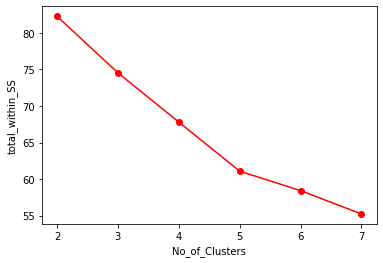

In [18]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [21]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data1_standardized)

y_kmeans

array([3, 0, 0, 3, 0, 0, 1, 3, 0, 3, 2, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 0,
       1, 3, 2, 1, 1, 0, 1, 2, 3, 3, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 2, 2,
       1, 2, 2, 1, 1, 2])

In [23]:
y_kmeans1=y_kmeans+1

cluster = list(y_kmeans1)

data1['cluster'] = cluster

In [25]:
kmeans_mean_cluster = pd.DataFrame(round(data1.groupby('cluster').mean(),1))
kmeans_mean_cluster.head()

,country,Murder,Assault,UrbanPop,Rape
cluster,,,,,
1,9.7,10.7,268.4,76.0,38.3
2,27.0,3.6,80.8,53.9,12.1
3,32.2,6.4,140.8,73.9,20.5
4,20.2,12.4,251.9,62.2,22.9


In [26]:
data1[data1['cluster']==1]

,country,Murder,Assault,UrbanPop,Rape,cluster
1,1,10.0,263,48,44.5,1
2,2,8.1,294,80,31.0,1
4,4,9.0,276,91,40.6,1
5,5,7.9,204,78,38.7,1
8,8,15.4,335,80,31.9,1
21,21,12.1,255,74,35.1,1
27,27,12.2,252,81,46.0,1


In [28]:
data1[data1['cluster']==2]

,country,Murder,Assault,UrbanPop,Rape,cluster
6,6,3.3,110,77,11.1,2
11,11,2.6,120,54,14.2,2
14,14,2.2,56,57,11.3,2
16,16,9.7,109,52,16.3,2
18,18,2.1,83,51,7.8,2
22,22,2.7,72,66,14.9,2
25,25,6.0,109,53,16.4,2
26,26,4.3,102,62,16.5,2
28,28,2.1,57,56,9.5,2
33,33,0.8,45,44,7.3,2


In [29]:
data1[data1['cluster']==3]

,country,Murder,Assault,UrbanPop,Rape,cluster
10,10,5.3,46,83,20.2,3
13,13,7.2,113,65,21.0,3
15,15,6.0,115,66,18.0,3
20,20,4.4,149,85,16.3,3
24,24,9.0,178,70,28.2,3
29,29,7.4,159,89,18.8,3
34,34,7.3,120,75,21.4,3
35,35,6.6,151,68,20.0,3
36,36,4.9,159,67,29.3,3
37,37,6.3,106,72,14.9,3


In [30]:
data1[data1['cluster']==4]

,country,Murder,Assault,UrbanPop,Rape,cluster
0,0,13.2,236,58,21.2,4
3,3,8.8,190,50,19.5,4
7,7,5.9,238,72,15.8,4
9,9,17.4,211,60,25.8,4
12,12,10.4,249,83,24.0,4
17,17,15.4,249,66,22.2,4
19,19,11.3,300,67,27.8,4
23,23,16.1,259,44,17.1,4
30,30,11.4,285,70,32.1,4
31,31,11.1,254,86,26.1,4


# hierarchical clustering

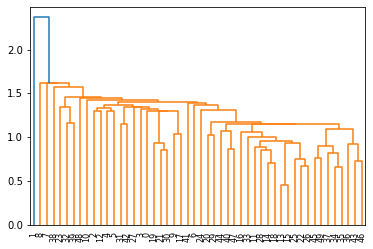

In [33]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram = sch.dendrogram(sch.linkage(data1_standardized, method='single'))

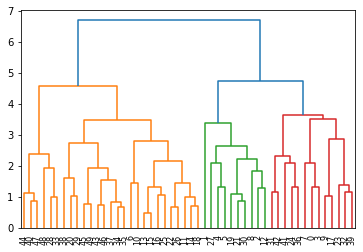

In [34]:
dendrogram = sch.dendrogram(sch.linkage(data1_standardized, method='complete'))

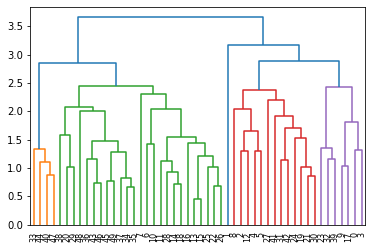

In [35]:
dendrogram = sch.dendrogram(sch.linkage(data1_standardized, method='average'))

In [36]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [40]:
y_hc = hc.fit_predict(data1_standardized)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)